## Mod 7 Lecture 1:  Discriminative vs. Generative Models

**Do this assignment in Google Colab**

Upload the FHV_072023.csv dataset into the 'sample_data' folder in Google Colab.  Recall this data is from July 1, 2025 to July 15, 2025.

Reorient yourself to the data [HERE](https://data.cityofnewyork.us/Transportation/2023-High-Volume-FHV-Trip-Data/u253-aew4/about_data)

**We will only work with the first 5000 rows**


In [1]:
# Imports
import pandas as pd 
import numpy as np

In [3]:
#Only look at the first 5,000 rows for speed
df = pd.read_csv("../Mod6/data/FHV_072023copy.csv", nrows=5000)
df.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0005,B03406,NaN,07/01/2023 05:34:30 PM,NaN,07/01/2023 05:37:48 PM,07/01/2023 05:44:45 PM,158,68,1.266,...,1.35,2.75,0.0,2.00,5.57,N,N,N,N,False
1,HV0003,B03404,B03404,07/01/2023 05:34:30 PM,07/01/2023 05:36:53 PM,07/01/2023 05:37:15 PM,07/01/2023 05:55:15 PM,162,234,2.350,...,1.52,2.75,0.0,3.28,13.38,N,N,NaN,N,False
2,HV0003,B03404,B03404,07/01/2023 05:34:30 PM,07/01/2023 05:35:17 PM,07/01/2023 05:35:52 PM,07/01/2023 05:44:27 PM,161,163,0.810,...,0.49,2.75,0.0,0.00,5.95,N,N,NaN,N,False
3,HV0003,B03404,B03404,07/01/2023 05:34:30 PM,07/01/2023 05:37:39 PM,07/01/2023 05:39:35 PM,07/01/2023 06:23:02 PM,122,229,15.470,...,5.17,2.75,0.0,0.00,54.46,N,N,NaN,N,True
4,HV0003,B03404,B03404,07/01/2023 05:34:30 PM,07/01/2023 05:36:06 PM,07/01/2023 05:36:39 PM,07/01/2023 05:45:06 PM,67,14,1.520,...,0.85,0.00,0.0,3.00,7.01,N,N,NaN,N,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hvfhs_license_num     5000 non-null   object 
 1   dispatching_base_num  5000 non-null   object 
 2   originating_base_num  3675 non-null   object 
 3   request_datetime      5000 non-null   object 
 4   on_scene_datetime     3675 non-null   object 
 5   pickup_datetime       5000 non-null   object 
 6   dropoff_datetime      5000 non-null   object 
 7   PULocationID          5000 non-null   int64  
 8   DOLocationID          5000 non-null   int64  
 9   trip_miles            5000 non-null   float64
 10  trip_time             5000 non-null   object 
 11  base_passenger_fare   5000 non-null   float64
 12  tolls                 5000 non-null   float64
 13  bcf                   5000 non-null   float64
 14  sales_tax             5000 non-null   float64
 15  congestion_surcharge 

## Prompt 1 (Using AI for Entire Workflow) (We Do)

Copy and paste Prompt 1 into Gemini (within Google Colab) and paste the output below.  Just accept the output as is and run it step-by-step (or autorun it)

**It may take awhile to run!** 
*While it is running discuss*: 
- What do you expect the AI output to be (how many lines of code, all coding cells or mix of code and markdown cells, etc.)? 
- Is there any part of this prompt you would change (delete or add)?
- What parts of this prompt would you want to evaluate the output of first?
- Do you think everyone will get the same output?

“**Context**: I’m using the first 5,000 rows of a single NYC HVFHV CSVs with data dated for July 1, 2023 and July 15, 2023. I want an MLR predicting total_amount from trip_miles, trip_time, and engineered features. 

**Artifacts**: Produce a single Python code cell that: (1) reads one local CSVs I’ll upload; (2) selects columns: pickup_datetime, trip_miles, trip_time, base_passenger_fare, tips, total_amount; (3) concatenates; (4) drops rows with missing in these columns; (5) builds a Pipeline with imputer→scaler→LinearRegression; (6) fits train/test (80/20, random_state=42); (7) prints MAE/RMSE. 

**Rules**: No network calls, use pandas/sklearn only, don’t rename columns. 

**Evaluation**: Add 3 asserts (no NA, >1,000 rows, numeric dtypes) and print shapes.”

## Before output

- I expect the output to be extensive. AI tends to write a lot of code, although it does work effectively most times within individual cells.
- I would probably change the label "Artifact" with "Task," though I don't expect it to make much of a difference. If I didn't have this prompt given to me, I probably would've made it as a list of steps.
- I would probably start at the bottom, with the evaluation. I would check to see the shapes and other evaluations to see if it matches with my own pre-check of the data.
- No, we will all be getting different outputs. They'll probably only be slightly different, but I don't believe any two will be alike.

In [8]:
import os
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
import pandas as pd
import numpy as np

# Read local CSV (if not found, fall back to existing `df`)

possible_paths = ["../Mod6/data/FHV_072023copy.csv", "FHV_072023.csv", "./sample_data/FHV_072023.csv"]
csv_path = next((p for p in possible_paths if os.path.exists(p)), None)
if csv_path:
    data = pd.read_csv(csv_path, nrows=5000)
else:
    # use existing df in the notebook if present
    data = globals().get("df")
    if data is None:
        raise FileNotFoundError("No CSV found and no existing `df` variable available.")

# Required columns
cols = ["pickup_datetime", "trip_miles", "trip_time", "base_passenger_fare", "tips", "total_amount"]

# If total_amount missing, try to compute from common fare components
if "total_amount" not in data.columns:
    components = ["base_passenger_fare", "tolls", "bcf", "sales_tax", "congestion_surcharge", "airport_fee", "tips"]
    if all(c in data.columns for c in components):
        data = data.copy()
        data["total_amount"] = data[components].sum(axis=1)
    else:
        raise KeyError("total_amount not found and cannot be constructed from components.")

# Select and drop rows with missing in these columns
df_sub = data[cols].copy()
df_sub = df_sub.dropna(subset=cols)

# Clean numeric-like strings (commas) and coerce
df_sub["trip_time"] = pd.to_numeric(df_sub["trip_time"].astype(str).str.replace(",", ""), errors="coerce")
df_sub["trip_miles"] = pd.to_numeric(df_sub["trip_miles"], errors="coerce")
df_sub["base_passenger_fare"] = pd.to_numeric(df_sub["base_passenger_fare"], errors="coerce")
df_sub["tips"] = pd.to_numeric(df_sub["tips"], errors="coerce")
df_sub["total_amount"] = pd.to_numeric(df_sub["total_amount"], errors="coerce")

# Derive simple engineered features from pickup_datetime
df_sub["pickup_datetime"] = pd.to_datetime(df_sub["pickup_datetime"], errors="coerce")
df_sub["pickup_hour"] = df_sub["pickup_datetime"].dt.hour
df_sub["pickup_dow"] = df_sub["pickup_datetime"].dt.dayofweek

# Final drop of any rows with NA in features/target
selected_features = ["trip_miles", "trip_time", "base_passenger_fare", "tips", "pickup_hour", "pickup_dow"]
df_sub = df_sub.dropna(subset=selected_features + ["total_amount"])

X = df_sub[selected_features].astype(float)
y = df_sub["total_amount"].astype(float)

# Evaluation asserts
assert X.isna().sum().sum() == 0 and y.isna().sum() == 0, "NA values remain in X or y"
assert X.shape[0] > 1000, f"Not enough rows after cleaning: {X.shape[0]}"
import pandas.api.types as ptypes
assert all(ptypes.is_numeric_dtype(dtype) for dtype in X.dtypes) and ptypes.is_numeric_dtype(y.dtype), "Non-numeric dtypes present"

print("Shapes -> X:", X.shape, "y:", y.shape)

# Build pipeline: imputer -> scaler -> LinearRegression
pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("reg", LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

Shapes -> X: (5000, 6) y: (5000,)
MAE: 1.8855
RMSE: 3.0736


/var/folders/gs/yv3dj4zx2tgdd5tw701ypspm0000gp/T/ipykernel_57348/782734737.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_sub["pickup_datetime"] = pd.to_datetime(df_sub["pickup_datetime"], errors="coerce")


## Prompt 2 (Using AI for Feature Engineering) - You Do

Copy and paste Prompt 2 into Gemini (within Google Colab) and paste the output below this cell

“Suggest 6 feature ideas for predicting total_amount using HVFHV trips with columns: trip_miles, trip_time, base_passenger_fare, tips, total_amount. Label each as: linear, interaction, polynomial, or bucket. Explain expected direction. Output as a markdown table; no code.”

| Feature idea | Type | Expected direction (why) |
|---|---|---|
| trip_miles | linear | Positive — longer distance → higher total_amount |
| trip_time | linear | Positive — longer duration → higher time-based charges → higher total_amount |
| base_passenger_fare * tips | interaction | Positive — high fare combined with high tips amplifies total_amount |
| trip_miles^2 | polynomial | Positive (increasing marginal effect) — very long trips may increase total nonlinearly |
| trip_time^2 | polynomial | Positive — long-duration trips can raise costs disproportionately |
| trip_miles bucket (e.g., 0–2, 2–10, >10) | bucket | Ordered effect: higher bucket → higher average total_amount |

## Prompt 3 (Using AI for Diagnostics) - You Do 

Copy and paste Prompt 2 into Gemini (within Google Colab) and paste the output below this cell. Just accept the output as is and run it step-by-step (or autorun it)

“Generate a Python cell (no external calls) to: (1) plot residuals vs predicted for my fitted pipe and X_test, y_test; (2) print top 10 coefficients with feature names from pipe.named_steps["pre"].get_feature_names_out() aligned to pipe.named_steps["reg"].coef_; (3) sort by absolute value; (4) warn if any absolute residual > 3×RMSE.”

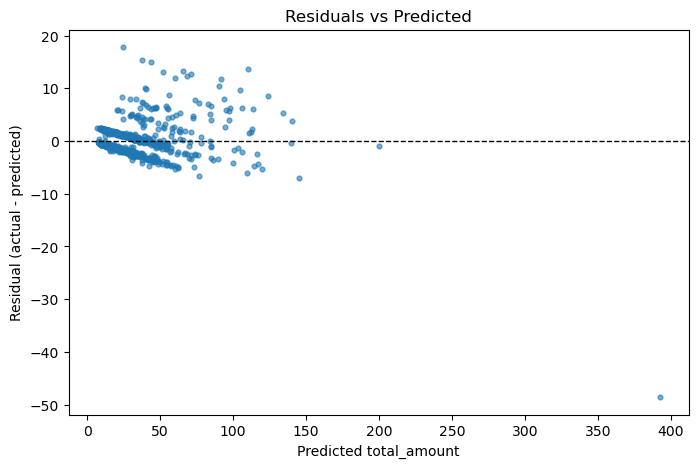

Top 10 coefficients (by |coef|):
base_passenger_fare: 22.151037
tips: 3.055786
trip_time: 0.453029
trip_miles: 0.342045
pickup_hour: -0.016393
pickup_dow: 0.000000


In [10]:
import numpy as np

import matplotlib.pyplot as plt

# ensure predictions exist
y_pred = pipe.predict(X_test) if "y_pred" not in globals() else y_pred

# residuals (aligned)
residuals = y_test.values - y_pred

# 1) plot residuals vs predicted
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.6, s=12)
plt.axhline(0, color="k", linestyle="--", linewidth=1)
plt.xlabel("Predicted total_amount")
plt.ylabel("Residual (actual - predicted)")
plt.title("Residuals vs Predicted")
plt.show()

# 2) get feature names aligned to coefficients
try:
    # try to get feature names from a preprocessing step if available
    pre = pipe.named_steps.get("pre")
    if pre is not None and hasattr(pre, "get_feature_names_out"):
        feature_names = pre.get_feature_names_out()
    else:
        # fallback: use selected_features (exists in notebook)
        feature_names = selected_features
except Exception:
    feature_names = selected_features

coefs = pipe.named_steps["reg"].coef_
if len(coefs) != len(feature_names):
    feature_names = selected_features

# 3) print top 10 coefficients sorted by absolute value
coef_pairs = sorted(zip(feature_names, coefs), key=lambda x: abs(x[1]), reverse=True)[:10]
print("Top 10 coefficients (by |coef|):")
for name, c in coef_pairs:
    print(f"{name}: {c:.6f}")

# 4) warn if any absolute residual > 3×RMSE
threshold = (3 * rmse) if "rmse" in globals() else 3 * np.sqrt(np.mean(residuals**2))
exceeds = np.abs(residuals) > threshold
if exceeds.any():
    print(f"WARNING: {exceeds.sum()} residual(s) exceed 3×RMSE (>{threshold:.4f})")
else:
    print("No residual exceeds 3×RMSE.")

## Reflection (Share Out)

1) What prompt(s) gave you the "best" output 
2) What were some issues you saw in the prompt output? 
3) **How did the MLR model GenAI gave you compare to the model you did in Mod6L10/Mod6L11?** VERY IMPORTANT
4) If you all didn't get the same responses, what do you think is a limitation of GenAI? (think "memory")
5) Are there any ethical issues with the prompt output?

1. Rather than the best output, I believe the worst output was the first prompt. Although it appears to be good, the output was underwhelming compared to the extensive code that the AI produced. The best one was likely the third, with a visual chart and some labeled metrics.
2. I didn't see any apparent issues. Only the 2nd prompt didn't automatically format into markdown.
3. The AI implemented a bunch of error metrics so the cell wouldn't fail. If an aspect of the model failed, it had an if statement that would account for errors. For me, this is different than my approach because I would rather just let the cell fail so it could point to which line is failing, and a reason for the error.
4. Depending on the LLM we used, there are countless things that could differ between the outputs. The data the LLM refers to, the token limit, and the differing context windows are all aspects that could affect the output of the model.
5. I think a big ethical issue is the potential inability to explain the output. If this continues going forward, especially with very complex tasks, the human in the loop aspect could get completely thrown out.